# 

# Quarterioni - SciML: Chapter 3.2.1-3.2.4

In [9]:
%pip install numpy matplotlib polars scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 55.5 MB/s eta 0:00:0031m54.3 MB/s eta 0:00:01
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Least square regression

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import polars as pl

### Experience (E)

In [8]:
df = pl.read_csv("https://raw.githubusercontent.com/ywchiu/riii/refs/heads/master/data/house-prices.csv")
df

Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
i64,i64,i64,i64,i64,i64,str,str
1,114300,1790,2,2,2,"""No""","""East"""
2,114200,2030,4,2,3,"""No""","""East"""
3,114800,1740,3,2,1,"""No""","""East"""
4,94700,1980,3,2,3,"""No""","""East"""
5,119800,2130,3,3,3,"""No""","""East"""
…,…,…,…,…,…,…,…
124,119700,1900,3,3,3,"""Yes""","""East"""
125,147900,2160,4,3,3,"""Yes""","""East"""
126,113500,2070,2,2,2,"""No""","""North"""


In [67]:
# x_labels = ["SqFt", "Bedrooms", "Bathrooms"]
x_labels = ["SqFt"]
y_label = "Price"

### Candidate model

In [93]:
f = lambda x: m * x + q

### Training (least square)

In [72]:
x2_sum = df.select(pl.col(*x_labels).pow(2).sum()).to_numpy()[0]
x_sum = df.select(pl.col(*x_labels).sum()).to_numpy()[0]
x_y_sum = df.select((pl.col(*x_labels) * pl.col(y_label)).sum()).to_numpy()[0]
y_sum = df.select(pl.col(y_label).sum()).to_numpy()[0]
N = [len(df)]

In [80]:
A = np.array([np.hstack([x2_sum, x_sum]), np.hstack([x_sum, N])])
b = np.hstack([x_y_sum, y_sum])
print(A, b)

[[518165000    256120]
 [   256120       128]] [33804280000    16694700]


In [85]:
m, q = scipy.linalg.solve(A, b)

### Measure performance

In [95]:
x = df[x_labels].to_numpy()
y_pred = f(x)
y = df[y_label].to_numpy()

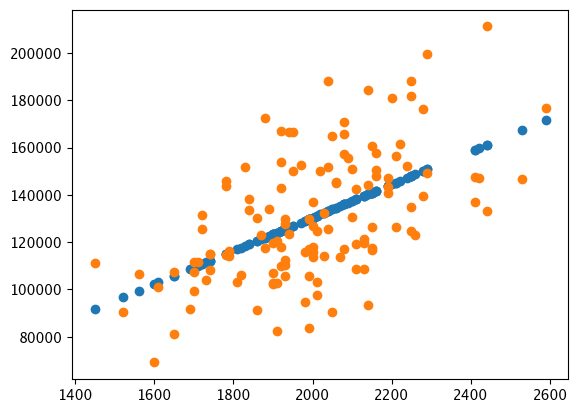

In [96]:
fig, ax = plt.subplots()
ax.scatter(x, y_pred)
ax.scatter(x, y)
plt.show()

In [98]:
MSE = ((y - y_pred)**2).sum() / len(y)
print(MSE)

119721577351.51236


In [100]:
RMSE = np.sqrt(MSE)
print(RMSE)

346008.0596626506


## Machine learning models

We assume there is a releation between the input and output data.

$$
f : x \mapsto y
$$

We need a rich enough hypothesis space.


What are wrong with e.g polynomials or fourier series (which we know are dense in $C(\Omega)$)?

1D: 

$$
f(x_1) = a_0 + a_1x_1 + a_2x_1^2 + \cdots
$$

2D (same degree polynomial):


$$
f(x_1, x_2) = a_{00} + a_{10}x_1 + a_{01}x_2 + a_{20}x_1^2 + a_{02}x_2^2   + a_{11}x_1x_2 + \cdots
$$


Number of parmameters of a degree $n$ polynomial with $k$ variables is

$$
\binom{k + n}{n}
$$

In [104]:
k = 2
n = 2
scipy.special.binom(k + n, n) - 1

np.float64(5.0)

In [103]:
k = 100
n = 100
scipy.special.binom(k + n, n) - 1

np.float64(9.054851465611432e+58)

For neural networks we also have the [universal approximation theorem](https://www.deep-mind.org/2023/03/26/the-universal-approximation-theorem/#Universal_Approximation_Theorem).
For NN we can get away with fewer parameters